**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/train-chennai-sale (1).csv")

In [ ]:
data.shape

(7109, 22)

In [ ]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**DATA** **CLEANING**

In [ ]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# PRT_ID

In [ ]:
data=data.drop(columns =['PRT_ID'])
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# AREA


In [ ]:
data.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [ ]:
data.AREA.isnull().sum()

0

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
data.AREA.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
data.AREA=data.AREA.replace('Karapakam','Karapakkam')
data.AREA=data.AREA.replace('Ana Nagar','Anna Nagar')
data.AREA=data.AREA.replace('Ann Nagar','Anna Nagar')
data.AREA=data.AREA.replace('Adyr','Adyar')
data.AREA=data.AREA.replace('Velchery','Velachery')
data.AREA=data.AREA.replace('Chrmpet','Chrompet')
data.AREA=data.AREA.replace('Chrompt','Chrompet')
data.AREA=data.AREA.replace('Chormpet','Chrompet')
data.AREA=data.AREA.replace('KKNagar','KK Nagar')
data.AREA=data.AREA.replace('TNagar','T Nagar')

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

# INT_SQFT

In [ ]:
data.INT_SQFT.isnull().sum()

0

In [ ]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

# DATE_SALE

In [ ]:
data.DATE_SALE.isnull().sum()

0

In [ ]:
data.DATE_SALE.values[0]

'04-05-2011'

In [ ]:
data.DATE_SALE = pd.to_datetime(data.DATE_SALE, format='%d-%m-%Y')

In [ ]:
data['DATE_SALE_YEAR'] = pd.DatetimeIndex(data['DATE_SALE']).year

In [ ]:
data.DATE_SALE_YEAR

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7104    2011
7105    2004
7106    2006
7107    2009
7108    2005
Name: DATE_SALE_YEAR, Length: 7109, dtype: int64

In [ ]:
data.DATE_SALE_YEAR

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7104    2011
7105    2004
7106    2006
7107    2009
7108    2005
Name: DATE_SALE_YEAR, Length: 7109, dtype: int64

# DATE_BUILD

In [ ]:
data.DATE_BUILD.isnull().sum()

0

In [ ]:
data.DATE_BUILD.values[0]

'15-05-1967'

In [ ]:
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD, format='%d-%m-%Y')
data.DATE_BUILD[0]

Timestamp('1967-05-15 00:00:00')

In [ ]:
data['DATE_BUILD_YEAR'] = pd.DatetimeIndex(data['DATE_BUILD']).year

In [ ]:
data.DATE_BUILD_YEAR

0       1967
1       1995
2       1992
3       1988
4       1979
        ... 
7104    1962
7105    1995
7106    1978
7107    1977
7108    1961
Name: DATE_BUILD_YEAR, Length: 7109, dtype: int64

In [ ]:
data['AGE_OF_BULDING'] = data.DATE_SALE_YEAR - data.DATE_BUILD_YEAR

In [ ]:
data.AGE_OF_BULDING

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE_OF_BULDING, Length: 7109, dtype: int64

# DIST_MAINROAD

In [ ]:
data.DIST_MAINROAD.isnull().sum()

0

In [ ]:
data.DIST_MAINROAD.values[0]

131

In [ ]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

# N_BEDROOM

In [ ]:
data.N_BEDROOM.isnull().sum()

1

In [ ]:
data = data.dropna(subset = ['N_BEDROOM'])

In [ ]:
data.N_BEDROOM = data.N_BEDROOM.astype("int64")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.N_BEDROOM

0       1
1       2
2       1
3       3
4       1
       ..
7104    1
7105    3
7106    2
7107    1
7108    3
Name: N_BEDROOM, Length: 7108, dtype: int64

In [ ]:
data.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

# N_BATHROOM

In [ ]:
data.N_BATHROOM.isnull().sum()

5

In [ ]:
data = data.dropna(subset = ['N_BATHROOM'])

In [ ]:
data.N_BATHROOM

0       1.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
7104    1.0
7105    2.0
7106    1.0
7107    1.0
7108    2.0
Name: N_BATHROOM, Length: 7103, dtype: float64

In [ ]:
data.N_BATHROOM = data.N_BATHROOM.astype("int64")

In [ ]:
data.N_BATHROOM.describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

#N_ROOM

In [ ]:
data.N_ROOM.isnull().sum()

0

In [ ]:
data.N_ROOM.describe()

count    7103.000000
mean        3.688723
std         1.019299
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

In [ ]:
data.N_ROOM

0       3
1       5
2       3
3       5
4       3
       ..
7104    2
7105    5
7106    4
7107    2
7108    5
Name: N_ROOM, Length: 7103, dtype: int64

# SALE_COND	

In [ ]:
data.SALE_COND.isnull().sum()

0

In [ ]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1427
Normal Sale    1422
AbNormal       1405
Family         1402
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
data.SALE_COND=data.SALE_COND.replace('Adj Land','AdjLand')
data.SALE_COND=data.SALE_COND.replace('Partiall','Partial')
data.SALE_COND=data.SALE_COND.replace('Ab Normal','AbNormal')
data.SALE_COND=data.SALE_COND.replace('PartiaLl','Partial')


In [ ]:
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1430
Normal Sale    1422
AbNormal       1410
Family         1402
Name: SALE_COND, dtype: int64

# PARK_FACIL


In [ ]:
data.PARK_FACIL.isnull().sum()

0

In [ ]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
data.PARK_FACIL.value_counts()

Yes    3584
No     3517
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
data.PARK_FACIL=data.PARK_FACIL.replace('Noo','No')

In [ ]:
data.PARK_FACIL.value_counts()

Yes    3584
No     3519
Name: PARK_FACIL, dtype: int64

In [ ]:
data.PARK_FACIL = data.PARK_FACIL.map({'Yes': 1,'No': 0}) #convert from string to 1/0

In [ ]:
data.PARK_FACIL

0       1
1       0
2       1
3       0
4       1
       ..
7104    0
7105    1
7106    0
7107    1
7108    1
Name: PARK_FACIL, Length: 7103, dtype: int64

# BUILDTYPE

In [ ]:
data.BUILDTYPE.isnull().sum()

0

In [ ]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
data.BUILDTYPE.value_counts()

House         2443
Commercial    2325
Others        2305
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
data.BUILDTYPE=data.BUILDTYPE.replace('Comercial','Commercial')
data.BUILDTYPE=data.BUILDTYPE.replace('Other','Others')

In [ ]:
data.BUILDTYPE.value_counts()

House         2443
Others        2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

# UTILITY_AVAIL

In [ ]:
data.UTILITY_AVAIL.isnull().sum()

0

In [ ]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
data.UTILITY_AVAIL.value_counts()

AllPub     1885
NoSeWa     1870
NoSewr     1826
ELO        1521
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.replace('All Pub','AllPub')

In [ ]:
data.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1870
NoSewr     1826
ELO        1521
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
data.UTILITY_AVAIL

0        AllPub
1        AllPub
2           ELO
3       NoSewr 
4        AllPub
         ...   
7104        ELO
7105     NoSeWa
7106     NoSeWa
7107        ELO
7108        ELO
Name: UTILITY_AVAIL, Length: 7103, dtype: object

# STREET

In [ ]:
data.STREET.isnull().sum()

0

In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
data.STREET.value_counts()

Paved        2558
Gravel       2518
No Access    2008
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
data.STREET=data.STREET.replace('Pavd','Paved')
data.STREET=data.STREET.replace('NoAccess','No Access')

In [ ]:
data.STREET.value_counts()

Paved        2570
Gravel       2518
No Access    2015
Name: STREET, dtype: int64

# MZZONE

In [ ]:
data.MZZONE.isnull().sum()

0

In [ ]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data.MZZONE.value_counts()

RL    1856
RH    1822
RM    1813
C      550
A      537
I      525
Name: MZZONE, dtype: int64

# QS_ROOMS

In [ ]:
data.QS_ROOMS.isnull().sum()

0

In [ ]:
data.QS_ROOMS

0       4.0
1       4.9
2       4.1
3       4.7
4       3.0
       ... 
7104    3.0
7105    3.6
7106    4.3
7107    4.6
7108    3.1
Name: QS_ROOMS, Length: 7103, dtype: float64

In [ ]:
data.QS_ROOMS=data.QS_ROOMS.astype('int64')

In [ ]:
data.QS_ROOMS

0       4
1       4
2       4
3       4
4       3
       ..
7104    3
7105    3
7106    4
7107    4
7108    3
Name: QS_ROOMS, Length: 7103, dtype: int64

# QS_BATHROOM

In [ ]:
data.QS_BATHROOM.isnull().sum()

0

In [ ]:
data.QS_BATHROOM

0       3.9
1       4.2
2       3.8
3       3.9
4       2.5
       ... 
7104    2.2
7105    4.5
7106    4.2
7107    3.8
7108    3.5
Name: QS_BATHROOM, Length: 7103, dtype: float64

In [ ]:
data.QS_BATHROOM=data.QS_BATHROOM.astype('int64')

In [ ]:
data.QS_BATHROOM

0       3
1       4
2       3
3       3
4       2
       ..
7104    2
7105    4
7106    4
7107    3
7108    3
Name: QS_BATHROOM, Length: 7103, dtype: int64

# QS_BEDROOM

In [ ]:
data.QS_BEDROOM.isnull().sum()

0

In [ ]:
data.QS_BEDROOM

0       4.9
1       2.5
2       2.2
3       3.6
4       4.1
       ... 
7104    2.4
7105    3.3
7106    2.9
7107    4.1
7108    4.3
Name: QS_BEDROOM, Length: 7103, dtype: float64

In [ ]:
data.QS_BEDROOM=data.QS_ROOMS.astype('int64')

In [ ]:
data.QS_BEDROOM

0       4
1       4
2       4
3       4
4       3
       ..
7104    3
7105    3
7106    4
7107    4
7108    3
Name: QS_BEDROOM, Length: 7103, dtype: int64

# QS_OVERALL

In [ ]:
data.QS_OVERALL.isnull().sum()

47

In [ ]:
data = data.dropna(subset = ['QS_OVERALL'])

In [ ]:
data.QS_OVERALL

0       4.330
1       3.765
2       3.090
3       4.010
4       3.290
        ...  
7104    2.520
7105    3.920
7106    3.840
7107    4.160
7108    3.640
Name: QS_OVERALL, Length: 7056, dtype: float64

# REG_FEE

In [ ]:
data=data.drop(columns =['REG_FEE'])

# COMMIS

In [ ]:
data=data.drop(columns =['COMMIS'])

# Final

In [ ]:
data.isnull().sum()

AREA               0
INT_SQFT           0
DATE_SALE          0
DIST_MAINROAD      0
N_BEDROOM          0
N_BATHROOM         0
N_ROOM             0
SALE_COND          0
PARK_FACIL         0
DATE_BUILD         0
BUILDTYPE          0
UTILITY_AVAIL      0
STREET             0
MZZONE             0
QS_ROOMS           0
QS_BATHROOM        0
QS_BEDROOM         0
QS_OVERALL         0
SALES_PRICE        0
DATE_SALE_YEAR     0
DATE_BUILD_YEAR    0
AGE_OF_BULDING     0
dtype: int64

In [ ]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'DATE_SALE_YEAR', 'DATE_BUILD_YEAR', 'AGE_OF_BULDING'],
      dtype='object')

In [ ]:
data

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,DATE_SALE_YEAR,DATE_BUILD_YEAR,AGE_OF_BULDING
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,1967-05-15,...,Paved,A,4,3,4,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,...,Gravel,RH,4,4,4,3.765,21717770,2006,1995,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,1992-02-09,...,Gravel,RL,4,3,4,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,...,Paved,I,4,3,4,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,1979-10-13,...,Gravel,C,3,2,3,3.290,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-01-03,51,1,1,2,AdjLand,0,1962-01-15,...,No Access,RM,3,2,3,2.520,5353000,2011,1962,49
7105,Velachery,1897,2004-04-08,52,3,2,5,Family,1,1995-04-11,...,No Access,RH,3,4,3,3.920,10818480,2004,1995,9
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,0,1978-09-01,...,Gravel,I,4,4,4,3.840,8351410,2006,1978,28
7107,Karapakkam,787,2009-08-03,40,1,1,2,Partial,1,1977-08-11,...,Paved,RL,4,3,4,4.160,8507000,2009,1977,32


In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,DATE_SALE_YEAR,DATE_BUILD_YEAR,AGE_OF_BULDING
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,1967-05-15,...,Paved,A,4,3,4,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,...,Gravel,RH,4,4,4,3.765,21717770,2006,1995,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,1992-02-09,...,Gravel,RL,4,3,4,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,...,Paved,I,4,3,4,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,1979-10-13,...,Gravel,C,3,2,3,3.290,7406250,2009,1979,30


In [ ]:
data.to_csv('cleanhouseprice.csv')

In [ ]:
datas =pd.read_csv('/content/cleanhouseprice.csv')

In [ ]:
datas

,Unnamed: 0,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,DATE_SALE_YEAR,DATE_BUILD_YEAR,AGE_OF_BULDING
0,0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,...,Paved,A,4,3,4,4.330,7600000,2011,1967,44
1,1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,...,Gravel,RH,4,4,4,3.765,21717770,2006,1995,11
2,2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,...,Gravel,RL,4,3,4,3.090,13159200,2012,1992,20
3,3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,...,Paved,I,4,3,4,4.010,9630290,2010,1988,22
4,4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,...,Gravel,C,3,2,3,3.290,7406250,2009,1979,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,7104,Karapakkam,598,2011-01-03,51,1,1,2,AdjLand,0,...,No Access,RM,3,2,3,2.520,5353000,2011,1962,49
7052,7105,Velachery,1897,2004-04-08,52,3,2,5,Family,1,...,No Access,RH,3,4,3,3.920,10818480,2004,1995,9
7053,7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,0,...,Gravel,I,4,4,4,3.840,8351410,2006,1978,28
7054,7107,Karapakkam,787,2009-08-03,40,1,1,2,Partial,1,...,Paved,RL,4,3,4,4.160,8507000,2009,1977,32


In [ ]:
datas.head()

,Unnamed: 0,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,DATE_SALE_YEAR,DATE_BUILD_YEAR,AGE_OF_BULDING
0,0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,...,Paved,A,4,3,4,4.330,7600000,2011,1967,44
1,1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,...,Gravel,RH,4,4,4,3.765,21717770,2006,1995,11
2,2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,...,Gravel,RL,4,3,4,3.090,13159200,2012,1992,20
3,3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,...,Paved,I,4,3,4,4.010,9630290,2010,1988,22
4,4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,...,Gravel,C,3,2,3,3.290,7406250,2009,1979,30


In [ ]:
datas=datas.drop(columns =['Unnamed: 0'])

**EDA**

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


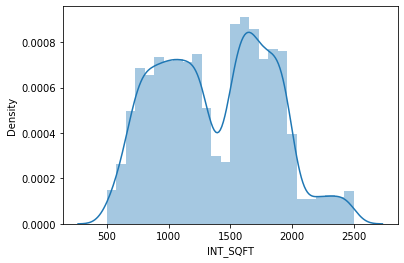

In [ ]:
sns.distplot(data.INT_SQFT)

Observation:
 Doesn't seem like normal distribution and it does not have effective squew

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


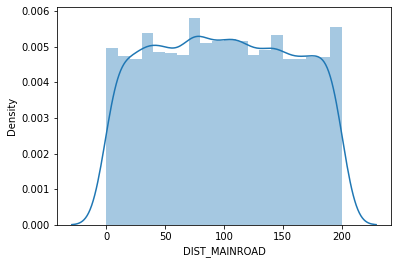

In [ ]:
sns.distplot(data.DIST_MAINROAD)

Observation:
It is uniformly distributed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


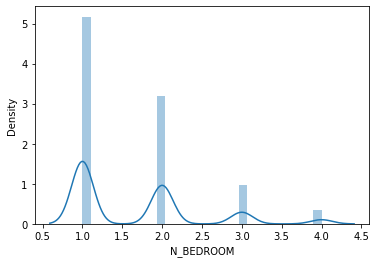

In [ ]:
sns.distplot(data.N_BEDROOM)

In [ ]:
value = data['SALE_COND'].value_counts()
name =data['SALE_COND'].unique()
fig=px.pie(data,values =value,names=name,color=value,title='Distribution of SALE_COND')
fig

Observation: All sale condition is equally distributed

In [ ]:
px.histogram(data,x='BUILDTYPE',color="AREA",barmode='group')

In [ ]:
px.histogram(data,x='PARK_FACIL',color="AREA",barmode='group')

In [ ]:
px.histogram(data,x='UTILITY_AVAIL',color="AREA",barmode='group')

In [ ]:
px.histogram(data,x='STREET',color="AREA",barmode='group')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



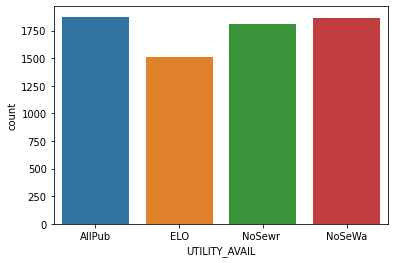

In [ ]:
sns.countplot(data.UTILITY_AVAIL)

# Feature vs Target

In [ ]:
target =data.SALES_PRICE
target

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7056, dtype: int64

Text(0.5, 1.0, 'DIST_MAINROAD VS TARGET')

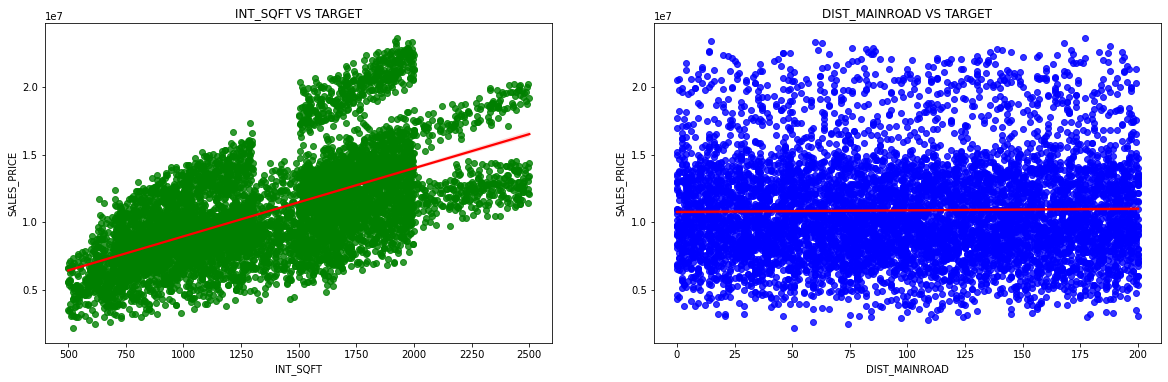

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot (x=data.INT_SQFT,y=target,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title("INT_SQFT VS TARGET")

plt.subplot(322)
sns.regplot (x=data.DIST_MAINROAD,y=target,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title("DIST_MAINROAD VS TARGET")


Observation:
1)there is a linear relationship INT_SQFT vs TARGET,no encoding required,when INT_SQFT raises SALES_PRICES also increases

2)there is no reationship in DIST_MAINROAD VS TARGET,we can drop the features

Text(0.5, 1.0, 'QS_OVERALL VS TARGET')

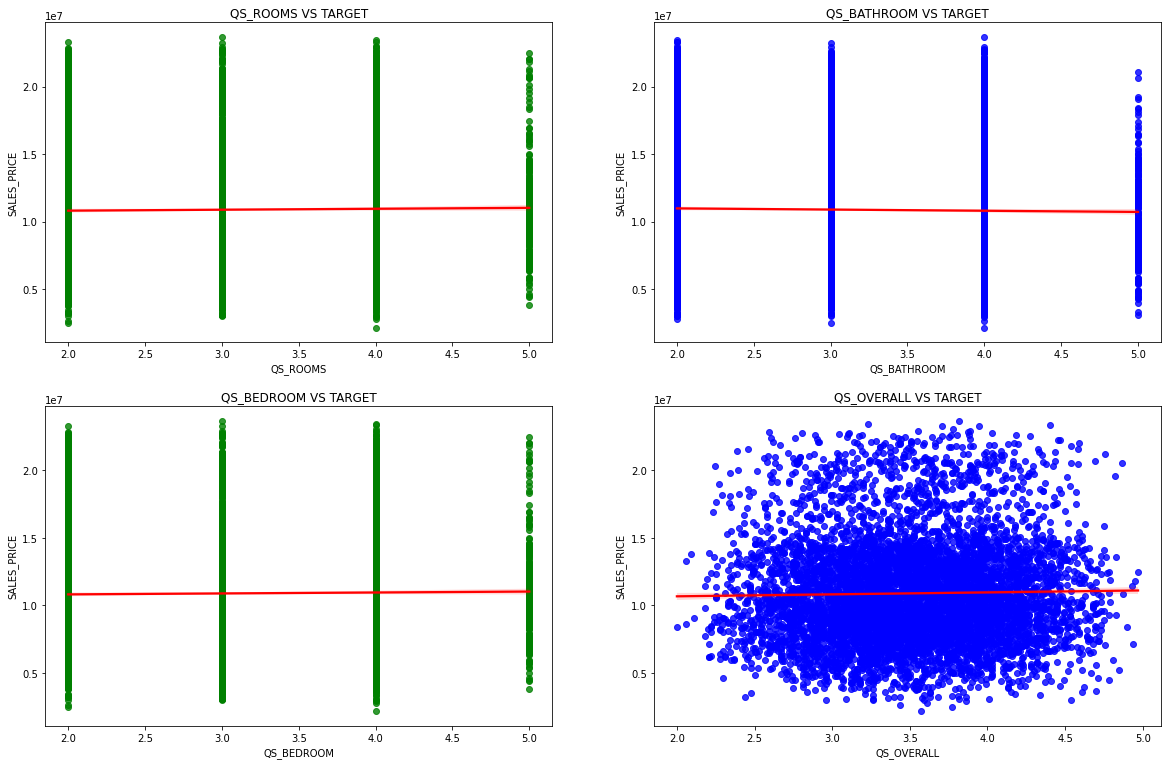

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot (x=data.QS_ROOMS,y=target,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title("QS_ROOMS VS TARGET")

plt.subplot(322)
sns.regplot (x=data.QS_BATHROOM,y=target,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title("QS_BATHROOM VS TARGET")

plt.subplot(323)
sns.regplot (x=data.QS_BEDROOM,y=target,scatter_kws={'color':'green'},line_kws={'color':'red'})
plt.title("QS_BEDROOM VS TARGET")

plt.subplot(324)
sns.regplot (x=data.QS_OVERALL,y=target,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title("QS_OVERALL VS TARGET")


Observation:there is no relationship between any of the features to the target,So we drop all four features

Text(0.5, 1.0, 'STREET vs SALES_PRICE')

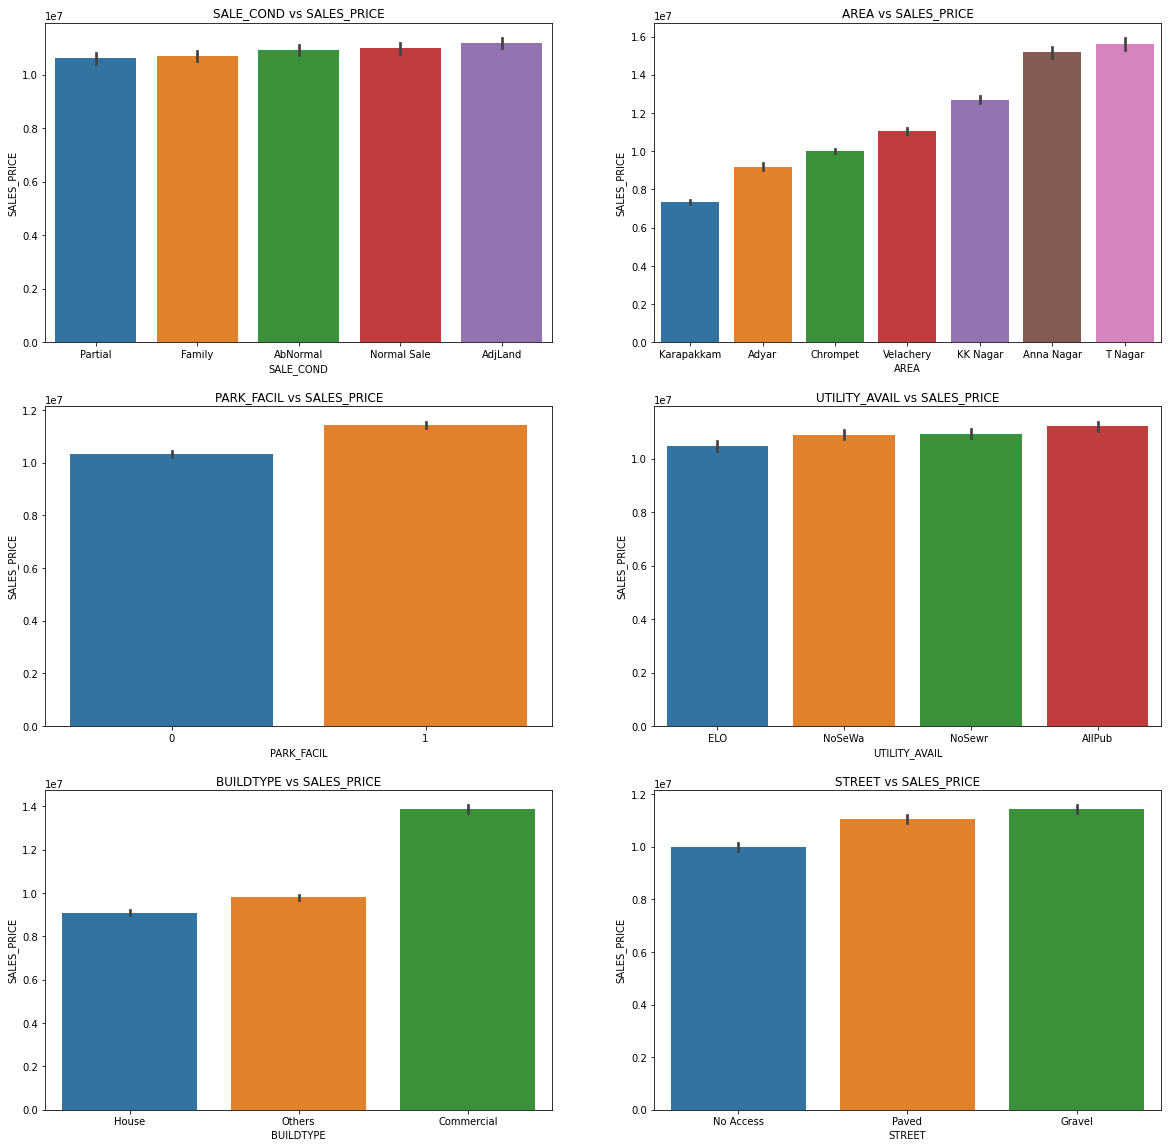

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND vs SALES_PRICE')

plt.subplot(322)
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('AREA vs SALES_PRICE')

plt.subplot(323)
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL vs SALES_PRICE')

plt.subplot(324)
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL vs SALES_PRICE')

plt.subplot(325)
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE vs SALES_PRICE')

plt.subplot(326)
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET vs SALES_PRICE')




Text(0.5, 1.0, 'N_BATHROOM vs SALES_PRICE')

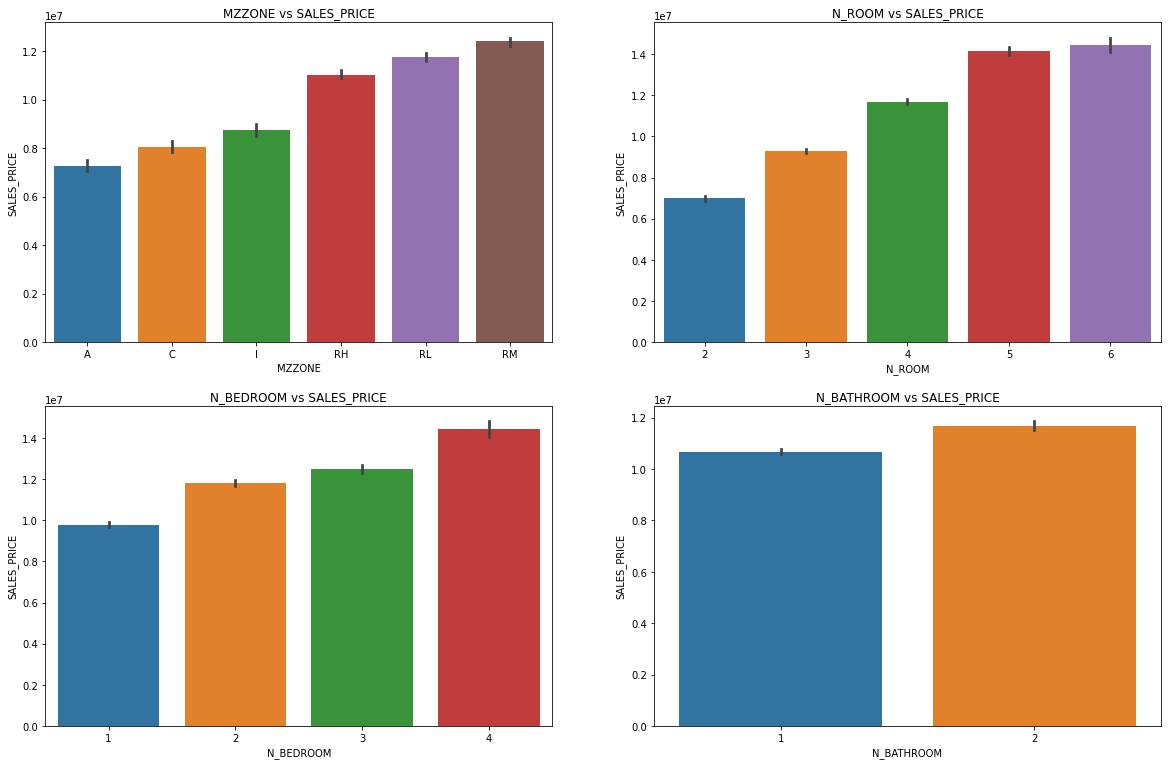

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(x=data.MZZONE,y=data.SALES_PRICE,order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE vs SALES_PRICE')

plt.subplot(322)
sns.barplot(x=data.N_ROOM,y=data.SALES_PRICE,order=data.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

plt.subplot(323)
sns.barplot(x=data.N_BEDROOM,y=data.SALES_PRICE,order=data.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('N_BEDROOM vs SALES_PRICE')

plt.subplot(324)
sns.barplot(x=data.N_BATHROOM,y=data.SALES_PRICE,order=data.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('N_BATHROOM vs SALES_PRICE')

# Deleting unwanted Features

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,DATE_SALE_YEAR,DATE_BUILD_YEAR,AGE_OF_BULDING
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,1,1967-05-15,...,Paved,A,4,3,4,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,0,1995-12-22,...,Gravel,RH,4,4,4,3.765,21717770,2006,1995,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,1,1992-02-09,...,Gravel,RL,4,3,4,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,0,1988-03-18,...,Paved,I,4,3,4,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,1,1979-10-13,...,Gravel,C,3,2,3,3.290,7406250,2009,1979,30


In [ ]:
data=data.drop(columns =['DIST_MAINROAD'])


In [ ]:
data=data.drop(columns =['QS_ROOMS'])

In [ ]:
data=data.drop(columns =['QS_BATHROOM'])

In [ ]:
data=data.drop(columns =['QS_BEDROOM'])

In [ ]:
data=data.drop(columns =['QS_OVERALL'])

In [ ]:
data=data.drop(columns =['DATE_SALE'])

In [ ]:
data=data.drop(columns =['DATE_BUILD'])

In [ ]:
data=data.drop(columns =['DATE_SALE_YEAR'])

In [ ]:
data=data.drop(columns =['DATE_BUILD_YEAR'])

In [ ]:
data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING
0,Karapakkam,1004,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,Family,0,Others,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,AdjLand,0,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,3,2,5,Family,1,Others,NoSeWa,No Access,RH,10818480,9
7106,Velachery,1614,2,1,4,Normal Sale,0,House,NoSeWa,Gravel,I,8351410,28
7107,Karapakkam,787,1,1,2,Partial,1,Commercial,ELO,Paved,RL,8507000,32


# ENCODING

AREA

In [ ]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
data.AREA = data.AREA.map({'Karapakkam': 1,'Adyar': 2,'Chrompet': 3,'Velachery': 4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})
data.AREA

0       1
1       6
2       2
3       4
4       1
       ..
7104    1
7105    4
7106    4
7107    1
7108    4
Name: AREA, Length: 7056, dtype: int64

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING
0,1,1004,1,1,3,AbNormal,1,Commercial,AllPub,Paved,A,7600000,44
1,6,1986,2,1,5,AbNormal,0,Commercial,AllPub,Gravel,RH,21717770,11
2,2,909,1,1,3,AbNormal,1,Commercial,ELO,Gravel,RL,13159200,20
3,4,1855,3,2,5,Family,0,Others,NoSewr,Paved,I,9630290,22
4,1,1226,1,1,3,AbNormal,1,Others,AllPub,Gravel,C,7406250,30


In [ ]:
data.isnull().sum()

AREA              0
INT_SQFT          0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
SALES_PRICE       0
AGE_OF_BULDING    0
dtype: int64

SALE_COND

In [ ]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
data.SALE_COND.isnull().sum()

0

In [ ]:
#data = data.dropna(subset = ['SALE_COND'])

In [ ]:
data.SALE_COND = data.SALE_COND.map({'Partial': 1,'Family': 2,'AbNormal': 3,'Normal Sale': 4,'AdjLand':5})
data.SALE_COND

0       3
1       3
2       3
3       2
4       3
       ..
7104    5
7105    2
7106    4
7107    1
7108    1
Name: SALE_COND, Length: 7056, dtype: int64

In [ ]:
data.SALE_COND.isnull().sum()

0

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING
0,1,1004,1,1,3,3,1,Commercial,AllPub,Paved,A,7600000,44
1,6,1986,2,1,5,3,0,Commercial,AllPub,Gravel,RH,21717770,11
2,2,909,1,1,3,3,1,Commercial,ELO,Gravel,RL,13159200,20
3,4,1855,3,2,5,2,0,Others,NoSewr,Paved,I,9630290,22
4,1,1226,1,1,3,3,1,Others,AllPub,Gravel,C,7406250,30


UTILITY_AVAIL

In [ ]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa'], dtype=object)

In [ ]:
data.UTILITY_AVAIL.isnull().sum()

0

In [ ]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'ELO': 1,'NoSeWa': 2,'NoSewr ': 3,'AllPub': 4})
data.UTILITY_AVAIL

0       4
1       4
2       1
3       3
4       4
       ..
7104    1
7105    2
7106    2
7107    1
7108    1
Name: UTILITY_AVAIL, Length: 7056, dtype: int64

In [ ]:
data.UTILITY_AVAIL.isnull().sum()

0

In [ ]:
data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING
0,1,1004,1,1,3,3,1,Commercial,4,Paved,A,7600000,44
1,6,1986,2,1,5,3,0,Commercial,4,Gravel,RH,21717770,11
2,2,909,1,1,3,3,1,Commercial,1,Gravel,RL,13159200,20
3,4,1855,3,2,5,2,0,Others,3,Paved,I,9630290,22
4,1,1226,1,1,3,3,1,Others,4,Gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,0,Others,1,No Access,RM,5353000,49
7105,4,1897,3,2,5,2,1,Others,2,No Access,RH,10818480,9
7106,4,1614,2,1,4,4,0,House,2,Gravel,I,8351410,28
7107,1,787,1,1,2,1,1,Commercial,1,Paved,RL,8507000,32


STREET

In [ ]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
data.STREET.isnull().sum()

0

In [ ]:
data.STREET = data.STREET.map({'No Access': 1,'Paved': 2,'Gravel': 3})
data.STREET

0       2
1       3
2       3
3       2
4       3
       ..
7104    1
7105    1
7106    3
7107    2
7108    2
Name: STREET, Length: 7056, dtype: int64

In [ ]:
data.STREET.isnull().sum()

0

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING
0,1,1004,1,1,3,3,1,Commercial,4,2,A,7600000,44
1,6,1986,2,1,5,3,0,Commercial,4,3,RH,21717770,11
2,2,909,1,1,3,3,1,Commercial,1,3,RL,13159200,20
3,4,1855,3,2,5,2,0,Others,3,2,I,9630290,22
4,1,1226,1,1,3,3,1,Others,4,3,C,7406250,30


MZZONE

In [ ]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
data.MZZONE.isnull().sum()

0

In [ ]:
data.MZZONE = data.MZZONE.map({'A': 1,'C': 2,'I': 3,'RH': 4,'RL':5,'RM':6})
data.MZZONE

0       1
1       4
2       5
3       3
4       2
       ..
7104    6
7105    4
7106    3
7107    5
7108    3
Name: MZZONE, Length: 7056, dtype: int64

In [ ]:
data.MZZONE.isnull().sum()

0

In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING
0,1,1004,1,1,3,3,1,Commercial,4,2,1,7600000,44
1,6,1986,2,1,5,3,0,Commercial,4,3,4,21717770,11
2,2,909,1,1,3,3,1,Commercial,1,3,5,13159200,20
3,4,1855,3,2,5,2,0,Others,3,2,3,9630290,22
4,1,1226,1,1,3,3,1,Others,4,3,2,7406250,30


In [ ]:
data = pd.get_dummies(data, columns = ['BUILDTYPE'])
data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,1,4,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,21717770,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,0,1,1,6,5353000,49,0,0,1
7105,4,1897,3,2,5,2,1,2,1,4,10818480,9,0,0,1
7106,4,1614,2,1,4,4,0,2,3,3,8351410,28,0,1,0
7107,1,787,1,1,2,1,1,1,2,5,8507000,32,1,0,0


In [ ]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,1,4,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,21717770,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,7406250,30,0,0,1


In [ ]:
data.isnull().sum()

AREA                    0
INT_SQFT                0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
SALES_PRICE             0
AGE_OF_BULDING          0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

***Encoding also finished

#Preparing the Data


In [ ]:
data

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_OF_BULDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,1,4,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,21717770,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,0,1,1,6,5353000,49,0,0,1
7105,4,1897,3,2,5,2,1,2,1,4,10818480,9,0,0,1
7106,4,1614,2,1,4,4,0,2,3,3,8351410,28,0,1,0
7107,1,787,1,1,2,1,1,1,2,5,8507000,32,1,0,0


In [ ]:
X=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14]]
X

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,AGE_OF_BULDING,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,1,4,2,1,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,0,1,1,6,49,0,0,1
7105,4,1897,3,2,5,2,1,2,1,4,9,0,0,1
7106,4,1614,2,1,4,4,0,2,3,3,28,0,1,0
7107,1,787,1,1,2,1,1,1,2,5,32,1,0,0


In [ ]:
y=data.iloc[:,[10]]
y

,SALES_PRICE
0,7600000
1,21717770
2,13159200
3,9630290
4,7406250
...,...
7104,5353000
7105,10818480
7106,8351410
7107,8507000


In [ ]:
X.shape


(7056, 14)

In [ ]:
y.shape

(7056, 1)

# **MODELING**

**LINEAR REGRESSION**

In [ ]:
from sklearn import linear_model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([[12814951.94528476],
       [15557939.41329524],
       [ 5266019.06079254],
       ...,
       [12743966.80244317],
       [10627107.43887543],
       [ 7092020.29421057]])

In [ ]:
from sklearn import metrics
print('R2 Score :',metrics.r2_score(y_test,y_pred))

R2 Score : 0.9266628498045463


In [ ]:
import matplotlib.pyplot as plt


**K-NEAREST NEIGHBOUR**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
x_train = X_train
x_test = X_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)
x_train =pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test =pd.DataFrame(x_test_scaled)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse_val =[]
for K in range(20):
  K=K+1
  model = neighbors.KNeighborsRegressor(n_neighbors = K)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  error = sqrt(mean_squared_error(y_test,pred))
  rmse_val.append(error)
  print("RMSE value of K= ", K ,'is: ' ,error )

RMSE value of K=  1 is:  1208112.2755723558
RMSE value of K=  2 is:  1045287.7509916837
RMSE value of K=  3 is:  1019930.7314632809
RMSE value of K=  4 is:  1021531.0025623202
RMSE value of K=  5 is:  1021441.0137846994
RMSE value of K=  6 is:  1030032.2254066061
RMSE value of K=  7 is:  1046699.9186136929
RMSE value of K=  8 is:  1049864.0373707872
RMSE value of K=  9 is:  1061691.1130235123
RMSE value of K=  10 is:  1061892.2443956214
RMSE value of K=  11 is:  1063980.3447509187
RMSE value of K=  12 is:  1074149.5785811264
RMSE value of K=  13 is:  1084653.1620737184
RMSE value of K=  14 is:  1096374.25720634
RMSE value of K=  15 is:  1100337.5243547228
RMSE value of K=  16 is:  1105452.1699416167
RMSE value of K=  17 is:  1116190.639902233
RMSE value of K=  18 is:  1126410.082725667
RMSE value of K=  19 is:  1134368.0035102624
RMSE value of K=  20 is:  1145030.9247059966


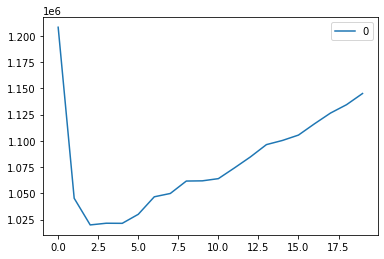

In [ ]:
curve = pd.DataFrame(rmse_val)
curve.plot()

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn,params,cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 5}

In [ ]:
rmse_val =[]
for k in range(20):
  k=k+1
  model=neighbors.KNeighborsRegressor(n_neighbors = k)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  error=model.score(x_test,y_test)
  rmse_val.append(error)
  print("RMSE value for k : ",k,'is: ',error)

RMSE value for k :  1 is:  0.8996176644694016
RMSE value for k :  2 is:  0.9248525195735724
RMSE value for k :  3 is:  0.928454214380589
RMSE value for k :  4 is:  0.928229527607411
RMSE value for k :  5 is:  0.9282421718689963
RMSE value for k :  6 is:  0.9270300034235205
RMSE value for k :  7 is:  0.9246493362445019
RMSE value for k :  8 is:  0.9241930854939057
RMSE value for k :  9 is:  0.9224754836197329
RMSE value for k :  10 is:  0.9224461076757762
RMSE value for k :  11 is:  0.9221408045146728
RMSE value for k :  12 is:  0.9206453781721737
RMSE value for k :  13 is:  0.9190858502522892
RMSE value for k :  14 is:  0.9173276351027063
RMSE value for k :  15 is:  0.9167288525626753
RMSE value for k :  16 is:  0.9159529229082463
RMSE value for k :  17 is:  0.9143121089436534
RMSE value for k :  18 is:  0.9127358706381572
RMSE value for k :  19 is:  0.9114984987411705
RMSE value for k :  20 is:  0.9098268722661916


In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn=neighbors.KNeighborsRegressor(i)
  knn.fit(x_train,y_train)
  print('K value: ',i,'cross validation score;', np.mean(cross_val_score(knn,x_train,y_train,cv=10)))

K value:  1 cross validation score; 0.894111330929562
K value:  2 cross validation score; 0.9203562892170828
K value:  3 cross validation score; 0.923505665170602
K value:  4 cross validation score; 0.924672721240672
K value:  5 cross validation score; 0.924334414647309
K value:  6 cross validation score; 0.924119971654185
K value:  7 cross validation score; 0.9216932384928958
K value:  8 cross validation score; 0.9204128865026127
K value:  9 cross validation score; 0.9188606977210675
K value:  10 cross validation score; 0.917517498930799
K value:  20 cross validation score; 0.9042054756999847
K value:  50 cross validation score; 0.8728713448435272


best value for n_neighbors is 4

**DECISION TREE**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(X_train,y_train)
dt.predict(X_test),y_test


(array([ 9493940., 14542670., 11541320., ...,  6377770., 11992650.,
        14615700.]),       SALES_PRICE
 943       9378485
 6846     14876760
 6654     11395530
 5909     11734800
 629       6846100
 ...           ...
 1304     20989850
 3518     10458600
 4274      6821735
 4642     12368280
 4930     14852210
 
 [2117 rows x 1 columns])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred=dt.predict(X_test)

mse_dt = mean_squared_error(y_test,y_pred)

rsquared = r2_score(y_test,y_pred)

rmse_dt = mse_dt**(1/2)

print('Test set of RMSE dt:  {:.2f}'.format(rmse_dt))

print('Test set of R2 of dt:  {:.2f}'.format(rsquared))

Test set of RMSE dt:  632607.11
Test set of R2 of dt:  0.97


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [ ]:
for depth in range(50,100):
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train,y_train)
  trainaccuracy = r2_score(y_train,dt.predict(X_train))
  dt=DecisionTreeRegressor(max_depth=depth)
  valaccuracy=cross_val_score(dt,X_train,y_train,cv=10,scoring=make_scorer(r2_score))
  print(depth,trainaccuracy,np.mean(valaccuracy))

50 1.0 0.9715510370456893
51 1.0 0.9717227602588832
52 1.0 0.9718456736364051
53 1.0 0.9716183160799332
54 1.0 0.9720619006757099
55 1.0 0.9714145232778637
56 1.0 0.9718796611639092
57 1.0 0.9713565403628127
58 1.0 0.9715211505436543
59 1.0 0.9715101948669776
60 1.0 0.9712997924596204
61 1.0 0.9713985570057384
62 1.0 0.9718562370000237
63 1.0 0.9715438372455422
64 1.0 0.9714649137551821
65 1.0 0.9716988409167279
66 1.0 0.9717172576624922
67 1.0 0.9717220951329125
68 1.0 0.970961100970926
69 1.0 0.9717126304858839
70 1.0 0.9716486789604513
71 1.0 0.9714467914272198
72 1.0 0.9718120426736025
73 1.0 0.9710430994365306
74 1.0 0.9718000950272317
75 1.0 0.9714863166825418
76 1.0 0.9718613681273695
77 1.0 0.9714691160688786
78 1.0 0.9713608305961845
79 1.0 0.9713579951020745
80 1.0 0.9717321682178482
81 1.0 0.9717450957718284
82 1.0 0.9713616744774042
83 1.0 0.9716034033606904
84 1.0 0.9711745560055217
85 1.0 0.9715671468473779
86 1.0 0.9715017483278832
87 1.0 0.9720054302445252
88 1.0 0.9716

depth = 82 cross validation score reached 0.9716153778372482 

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
rf=RandomForestRegressor(n_estimators=100,max_depth=9,max_features='sqrt')

In [ ]:
rf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=9, max_features='sqrt')

In [ ]:
prediction=rf.predict(X_test)

In [ ]:
r2_score(prediction,y_test)

0.9701407407127715

**XG** **BOOST**

In [ ]:
x_train=X_train
x_test=X_test

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model=xgb.XGBRegressor(learning_rate = lr,n_estimators=100,verbosity=0)
  model.fit(x_train,y_train)
  model.score(x_test,y_test)
  print("Learnig rate : ", lr,'Train score : ',model.score(x_train,y_train),"Cross validation score : ",np.mean(cross_val_score(model,x_test,y_test)))

Learnig rate :  0.01 Train score :  -0.3697607912493013 Cross validation score :  -0.4249004799172095
Learnig rate :  0.02 Train score :  0.7483302641425773 Cross validation score :  0.7347962707783412
Learnig rate :  0.03 Train score :  0.9256407840366979 Cross validation score :  0.9189459865997838
Learnig rate :  0.04 Train score :  0.9631209260040966 Cross validation score :  0.9570701834916429
Learnig rate :  0.05 Train score :  0.9754692340572798 Cross validation score :  0.9697434034552336
Learnig rate :  0.06 Train score :  0.981299649114624 Cross validation score :  0.9763689202480261
Learnig rate :  0.07 Train score :  0.9850527275918103 Cross validation score :  0.981097801430791
Learnig rate :  0.08 Train score :  0.9893031402747204 Cross validation score :  0.9844183408502756
Learnig rate :  0.09 Train score :  0.990325871251773 Cross validation score :  0.9864503499859643
Learnig rate :  0.1 Train score :  0.992206511493189 Cross validation score :  0.9883669355318723
Lea

In [ ]:
model=xgb.XGBRegressor(learning_rate =0.5,n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

[02:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9962611303001259

[(0.24462514, 'AREA'),
 (0.036002748, 'INT_SQFT'),
 (0.0033091998, 'N_BEDROOM'),
 (0.00049082213, 'N_BATHROOM'),
 (0.18347469, 'N_ROOM'),
 (0.004932956, 'SALE_COND'),
 (0.04552527, 'PARK_FACIL'),
 (0.0023118726, 'UTILITY_AVAIL'),
 (0.020439764, 'STREET'),
 (0.030486442, 'MZZONE'),
 (0.0032348714, 'AGE_OF_BULDING'),
 (0.39201233, 'BUILDTYPE_Commercial'),
 (0.031047203, 'BUILDTYPE_House'),
 (0.0021067404, 'BUILDTYPE_Others')]

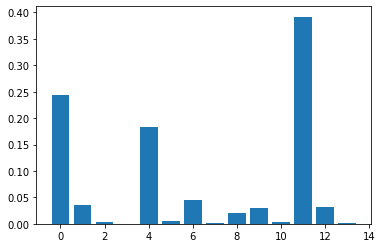

In [ ]:
importance = model.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns))

# Results



*   Commercial buildings,area of the buildings and number of rooms features are the most important feature to the seller to sell the building with more cost
and parking facility might slightly contribute to the sales price.

*   For buyers,there are some feature to identify the best and fair price of the building.

*   BUILDTYPE_House are the best  feature for buying house





